# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


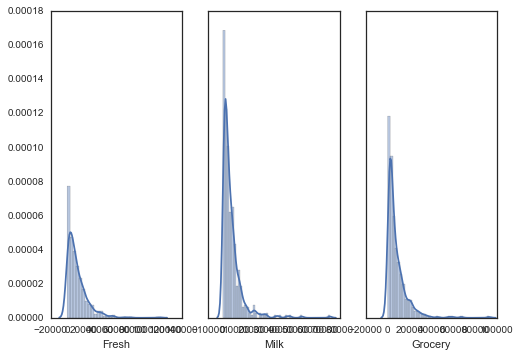

In [3]:
## Visualizing the distribution of the features 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
## plt.rcParams['figure.figsize']=(6,6)
fig, axs = plt.subplots(ncols=3, nrows=1, sharey=True)
sns.distplot(data[data.columns[0]], ax = axs[0])
sns.distplot(data[data.columns[1]], ax = axs[1])
sns.distplot(data[data.columns[2]], ax = axs[2])

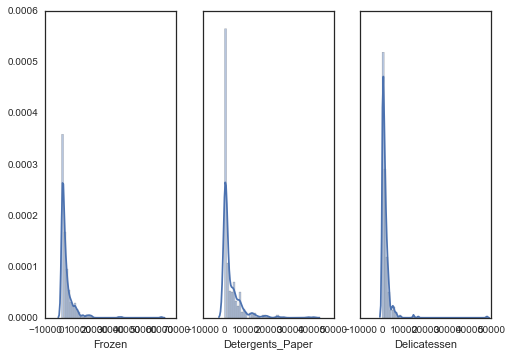

In [4]:
fig, axs = plt.subplots(ncols=3, nrows=1, sharey=True)
sns.distplot(data[data.columns[3]], ax = axs[0])
sns.distplot(data[data.columns[4]], ax = axs[1])
sns.distplot(data[data.columns[5]], ax = axs[2])

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 200, 301]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,3067,13240,23127,3941,9959,731
2,5283,13316,20399,1809,8752,172


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [6]:
## computing the percentile associated with each purchase price 
from scipy import stats
sample_pctl = np.zeros((len(samples.index),len(samples.columns)))

for col in np.arange(len(samples.columns)):
    for row in np.arange(len(samples.index)):
        sample_pctl[row, col] = round(stats.percentileofscore(data[data.columns[col]].tolist(), 
                                                            samples.loc[row, data.columns[col]]), 1)
        
sample_pctl = pd.DataFrame(sample_pctl, columns = samples.columns)

In [7]:
## Money spent on product categories
display(samples)
## Percentiles of the money spent (to identify customer/ establishment type)
display(sample_pctl)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,3067,13240,23127,3941,9959,731
2,5283,13316,20399,1809,8752,172


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,89.3,98.9,93.6,83.2,78.0,99.8
1,24.3,91.8,94.5,77.7,94.1,41.4
2,35.5,92.3,92.0,55.9,92.3,9.8


**Answer:**
1. All the purchases of the first customer lie in the top quartile (with Milk, Grocery and Delicatessen lying above the 90th percentile). These high values hint to the large size of the establishment. My guess is that this customer represents a large departmental store which in addition to retail commodities also has a large in house Deli or restaurant (which may explain the relatively high values of Fresh and Delicatessen)

2. The milk, grocery and frozen category purchases of the second customer are comparable to the first one. So, my guess is that this customer represents a convenience store with a relatively smaller deli/ prepared foods dervices (owing to the lower purchases of Fresh and Delicatessen products). One can also observe that this convenience store is likely to have more detergents and paper products relative to the first one. 

3. The third customer looks similar to the second in many respects (hence most likely a convenience store) with little or no prepared food services (owing to the small value of Delicatessen purcahses). We can also see that the second customer has slightly higher fresh product purchases and lower Frozen purchases. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
## studying the correlation between features
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [9]:
# IMPORTS
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data
response = 'Grocery'
labels = data[response]
features = data.drop(response, axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# TODO: Report the score of the prediction using the testing set
score = r2_score(y_pred, y_test)
score

0.61667225335206122

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
After trying all the features, I found that the Decision tree model with 'Grocery' as the label returns the highest test r squared score. The reported r squared score is approximately 0.62. 

If relative relevance is defined in terms of 'degree of importance' in determining customer behaviour, I would say 'Grocery' is relatively less relevant because it is very correlated with Detergents_Paper (0.92) and Milk (0.73). Moreover, the predictive model above has the highest R squared score when 'Grocery' is the target or response variable.  This means that a large portion of variation in 'Grocery' is also contained in 'Detergents_Paper' and 'Milk' and removing 'Grocery' may not result in a loss of information in our unsupervised analysis of identifying customer segments. However, It is important to note that although 'Grocery' has high correlation with other features, it is not 100 % related, so it would be an extreme statement to categorize 'Grocery' as completely irrelevant. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

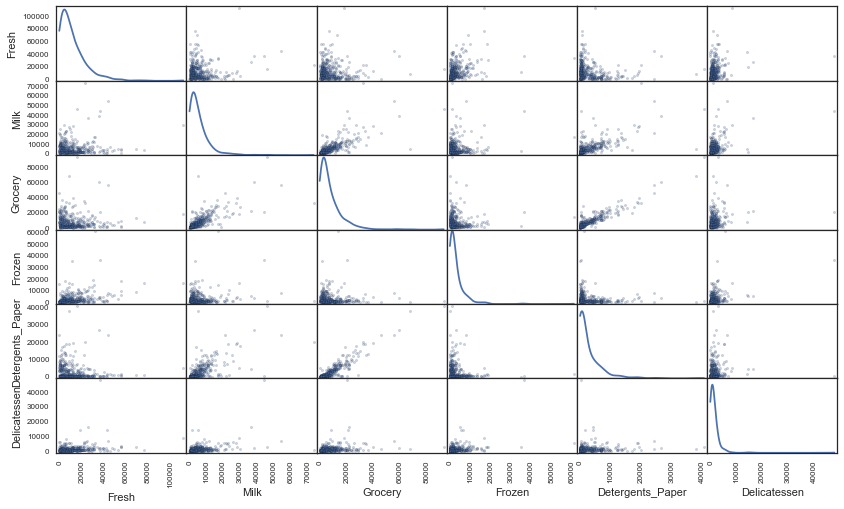

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
From the scatter matrix above, it can be observed that the 'Grocery' feature shows a high degree of correlation with 'Milk' and 'Detergents_Paper features'. This supports our conclusion that the 'Grocery' feature is relatively irrelevant in identifying different customer segments because a lot of of the information in 'Grocery' is contained within the 'Milk' and 'Detergents_Paper' features. 

The correlation matrix shows weak association of 'Delicatessen' with 'Milk' (0.40) and 'Frozen' (0.39) Products. But looking at the scatter plot matrix these associations look very insignificant. 

All the features in our dataset have positively skewed distributions as shown by the diagonal plots. Most of the data points lie in the lower end of the distribution. The scatter plots reaffirm this observation.     

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

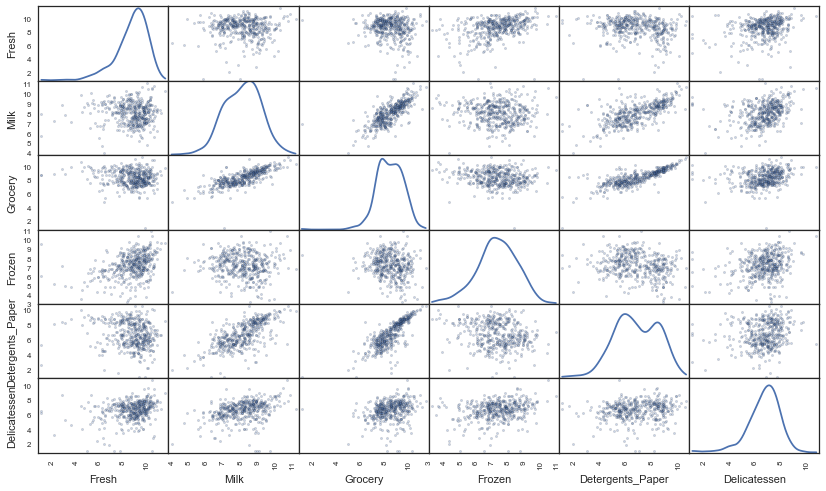

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
## Studying the correlations of log transformed data
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.572249,9.496722,9.923241,7.500529,9.077038,5.147494


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [30]:
# IMPORTS
from collections import Counter

# For each feature find the data points with extreme high or low values
tukey_outliers = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    feature_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    print feature_outlier.tolist()
    tukey_outliers = tukey_outliers + feature_outlier.tolist()
    
    print "Concatenated outliers till now: " 
    print tukey_outliers
    print "Outlier table for '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove

# Remove the outliers, if any were specified
outliers = []
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Outlier table for 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
[86, 98, 154, 356]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356]
Outlier table for 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
[75, 154]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154]
Outlier table for 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Outlier table for 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
[75, 161]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161]
Outlier table for 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
Concatenated outliers till now: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
Outlier table for 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [15]:
## Outlier detection using PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(log_data), index=data.index, columns=data.columns)
X.head()

## defining and fitting model 
pca = PCA()
pca_loadings = pd.DataFrame(pca.fit(X).components_.T, index=data.columns, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_loadings

,V1,V2,V3,V4,V5,V6
Fresh,-0.104627,0.590474,-0.631894,0.488525,-0.041160,-0.027447
Milk,0.542274,0.133145,-0.076076,-0.061386,0.761634,0.313958
Grocery,0.571694,-0.006282,-0.133450,-0.095672,-0.098101,-0.797835
Frozen,-0.138351,0.589535,-0.033630,-0.791609,-0.074144,0.005889
Detergents_Paper,0.551338,-0.068624,-0.197258,-0.077347,-0.618326,0.513904
Delicatessen,0.212235,0.530389,0.732852,0.340286,-0.144124,0.002238


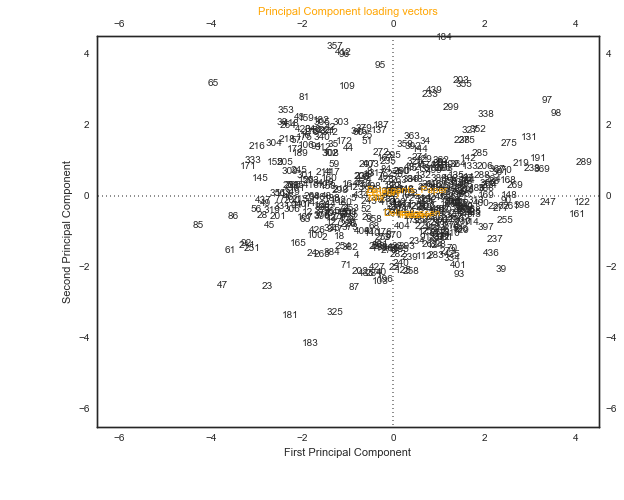

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-6.5,4.5)
ax1.set_ylim(-6.5,4.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-14,14, linestyles='dotted', colors='grey')
ax1.vlines(0,-14,14, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-6.5,4.5)
ax2.set_xlim(-6.5,4.5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3]);

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [17]:
## frequenct of outliers
freq_outliers = Counter(tukey_outliers)
freq_outliers
freq_outliers = pd.Series(freq_outliers, name='Outlier Frequency').sort_values(ascending = False)
display(freq_outliers.head(n=10)) 

154    3
128    2
65     2
66     2
75     2
439    1
175    1
171    1
161    1
145    1
Name: Outlier Frequency, dtype: int64

**Answer:**
The frequency profile of outliers shown above indicates that observation 154 is a tukey outlier for 3 features. Similary observations 128, 65, 66 and 75 were also identified as tukey outliers for 2 features each. 

The above observations may be statistically defined as outliers but I think they do represent vslid customer purchases. Initially I did not remove any identified Tukey outliers based on this reasoning. Later I decided to do away with a few extreme value outliers because I believed they would affect the outcome of clustering (for customer segmantation) done in the later part of the project. I went a step further and applied Principal Components Analysis to all available features and identified Tukey outliers for the first two principal components. I believe that the outliers based on the the first two Pricipal Components do represent the overall extreme value observations within the data.

The implementation for my methodology is given below:

In [18]:
## function to get tukey outliers from a dataframe
def get_tukey_outliers(data):
    tukey_outliers = []
    for feature in data.keys():

        ## First Quartile
        Q1 = np.percentile(data.loc[:, feature], 25)

        ## Third Quartile
        Q3 = np.percentile(data.loc[:, feature], 75)

        ## InterQuartile range
        step = 1.5 * (Q3 - Q1)

        # Display the outliers
        print "Data points considered outliers for the feature '{}':".format(feature)

        feature_outlier = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))].index
        print feature_outlier.tolist()
        tukey_outliers = tukey_outliers + feature_outlier.tolist()
        
        print "Concatenated outliers till now: " 
        print tukey_outliers

    return tukey_outliers

## tukey outliers in the first two PCs
##tukey_pc_outliers = get_tukey_outliers(df_plot[['PC1', 'PC2']])
PC_outliers = get_tukey_outliers(df_plot[['PC1', 'PC2']])

outliers = PC_outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'PC1':
[75, 154]
Concatenated outliers till now: 
[75, 154]
Data points considered outliers for the feature 'PC2':
[65, 66, 95, 96, 109, 128, 154, 181, 183, 184, 203, 233, 325, 355, 357, 412, 439]
Concatenated outliers till now: 
[75, 154, 65, 66, 95, 96, 109, 128, 154, 181, 183, 184, 203, 233, 325, 355, 357, 412, 439]


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

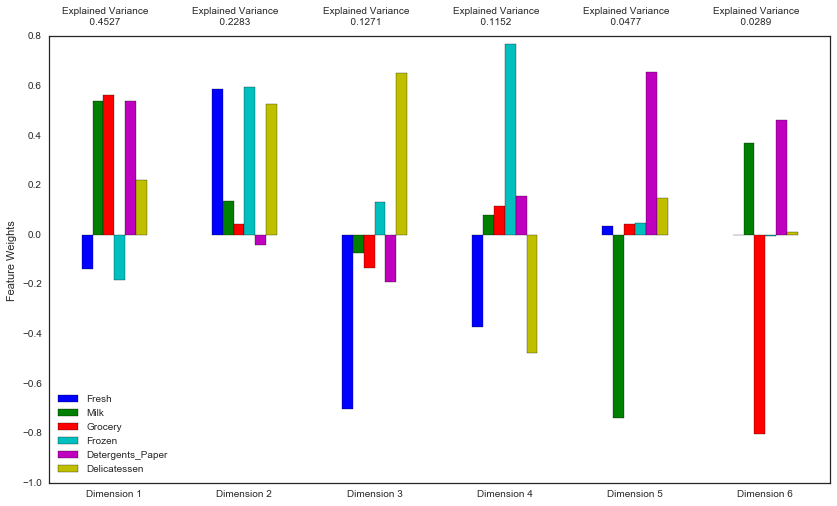

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
X = scale(good_data)
pca = PCA()
loadings = pca.fit(X)
loadings_df = pd.DataFrame(pca.fit(X).components_.T, index = data.columns, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.fit_transform(X)
pca_samples_df = pd.DataFrame(pca.fit_transform(X) , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
Individually, the first and second principal component explain 45.27 % and 22.83 % of the variance respectively. Hence, in total the first two PCs explain 68.1 % of the variance within the dataset. The first four components on the other hand explain 92.33 % of the entire variation. The interpretation of the first four PCs is discussed below:

1. High loadings/ weights of Grocery, Milk and Detergents/ Paper products indicate that that the first PC is highly correlated to these features. Therefore, customers with relatively higher purchases of these products collectively will have a higher value of first PC. The lower absolute loadings associated with the other features indicate that they do not have a signifcant role to play in determining the value of first PC. An alternate way to view the first PC is that Grocery, Milk and Detergent/ paper products can be thought of as main product categories purchased by departmental/ convenience stores. Therefore high first PC values are likely to correspond to large departmental/ convenient stores   

2. The second PC is highly correlated with Fresh, Frozen and Delicatessen purchases as indicated by the high positive loadings for the features. The customers with higher values of the second PC represent a greater spending on the mentioned product categories. Alternateively, these product categories can be thought of as materials used in establishments with prepared food services. High value PC observations may correspond to large Delis or restaurants.

3. The third PC has a high positive loading for Delicatessen products but has a high negative loading for Frozen products. Customers with high values of PC 3 are likely to have high amounts of Deli product purchases and very low Fresh product purchases. 

4. The fourth PC on the other hand has a high positive loading for Frozen products but has a substantially high negative weights associated with Deli and Fresh products. Customers with high values of PC 4 are likely to have high amounts of Frozen product purchases but relatively much lower Deli and Fresh product purchases. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values).head(n=10))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.4688,-0.3615,-0.5495,-1.3926,-0.2947,0.3089
1,1.4709,0.5479,0.1059,0.0493,-0.1164,0.1836
2,1.5708,1.3110,1.0738,-0.3642,0.1759,0.3476
3,-0.9057,1.2182,0.3696,0.2599,0.6722,-0.4451
4,0.7769,1.8945,0.3139,-0.3580,0.2535,0.0319
5,0.9293,0.0745,-0.1114,-0.7087,-0.3098,0.4398
6,0.6196,-0.5459,-0.8802,-0.5718,0.4530,0.0126
7,1.1875,0.6331,0.3205,-0.2118,0.4128,-0.0384
8,0.5877,-0.7571,-0.2475,-0.6353,0.1383,-0.0103
9,2.2720,0.3662,0.0560,-0.0799,0.1397,-0.0701


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(X)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.fit_transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
display(samples)

,Dimension 1,Dimension 2
0,-3.0012,0.1674
1,0.9155,-0.7276
2,2.0858,0.5602


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,3067,13240,23127,3941,9959,731
2,5283,13316,20399,1809,8752,172


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K means clustering algorithm works better in situations where we have some separation between the clusters and it makes sense to definitively assign a data point to one of the k clusters. However, if the separation is not as prominent (there is an overlap in the cluster distributions), Gaussian mixture model can be used, which instead of definitvely assigning data points to clusters assigns probablility/ likelihood that the data point lies in the kth cluster. 

So far after conducting some exploratory analyisis, I believe the wholesale data does not have clear separations between customer segments. Therefore may be a probabilistic clustering approach or soft assignment ot customer segments makes more sense in this case.  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
# IMPORTS
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
score

0.41874001556884038

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 


**Answer:**
For Gaussian mixture model, the following values of number of clusters were tried:
1. cluster number = 2  (score = 0.42)
2. cluster number = 3  (score = 0.33)
3. cluster number = 4  (score = 0.31)
4. cluster number = 5  (score = 0.28)
5. cluster number = 6  (score = 0.29)
6. cluster number = 7  (score = 0.32)
7. cluster number = 8  (score = 0.29)
8. cluster number = 9  (score = 0.31)
9. cluster number = 10 (score = 0.25)

Number of clusters = 2 appears to have the best silhouette score and hence is the optimal number of customer segments given the data.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

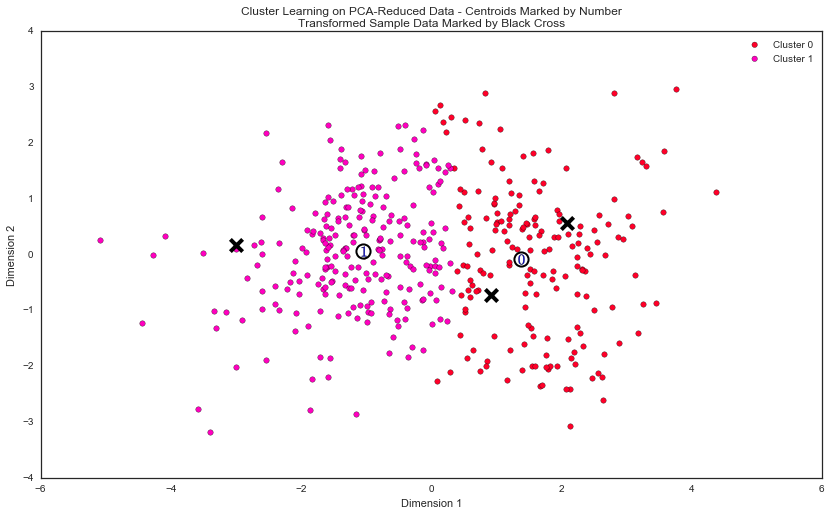

In [24]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
print clusterer.means_

[[ 1.3828238  -0.07365775]
 [-1.05531385  0.05621254]]


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4239,13643,21721,2712,9143,392
Segment 1,11679,23535,21895,3883,6045,3143


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [27]:
center_pctl = np.zeros((len(true_centers.index),len(true_centers.columns)))

for col in np.arange(len(true_centers.columns)):
    for row in np.arange(len(true_centers.index)):
        center_pctl[row, col] = round(stats.percentileofscore(data[data.columns[col]].tolist(),
                                                              true_centers.loc[true_centers.index[row], true_centers.columns[col]]),1)
        
center_pctl = pd.DataFrame(center_pctl, columns=true_centers.columns, index = true_centers.index)
center_pctl

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,30.0,92.3,93.2,67.7,93.0,23.2
Segment 1,62.7,97.3,93.2,77.0,84.5,91.4


**Answer:**
Upon observing the quartile table above, it seems that the major difference between segment 0 and 1 occurs on the basis of Fresh, Frozen and Delicatessen purcahses. My hypothesis is that the Segment 0 center, owing to higher purcases of the above mentioned categories, represents establishments that offer prepared food services. These can include large departmental stores with in house delis or restaurants. Segment 0 on the other hand seems to represent retial outlets/ stores with no prepared food services.  

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
The first customer from our sample dataset best is best represented by Segment 1 because of relatively higher purcahses of Fresh, Deli and Frozen category products. We can make an educated guess that this must be an establishment with some prepared food service (either a large restaurant or a large departmental store with an in house restaurant/ deli). The second and the third customers are pretty similar and are most probably part segemnt 0 because of the relatively lesser purchases in the Fresh, Frozen and Deli categories (quartile values closer to that of segment 0 center). 

The predictions above are also consistent with our observations. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The wholesaler can run an A/B test/ experiment where the delivery system is changed for a randomly selected sample of  customers with roughly equal representation from both customer segments. After changing the delivery mechanism, the reaction of the customers from the two segments can be recorded and compared. This can help the wholesale dealer to decide whether to apply the change to one, both or neither of the customers. 

It won't be surprising if the wholesaler receives varied reactions by different segments. For example, it is likely that the establishments that order greater amounts of Fresh products (Category 1) woud prefer a greater frequency of delivery as opposed to customers that do not (Category 0)

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
This can be translated into a supervised learning problem. The clustering outcomes i.e. customer segments can now play a role of labels/ target and the customer purcahases of different category products can act as features . We can train a supervised model which can predict the segments of the new incoming customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

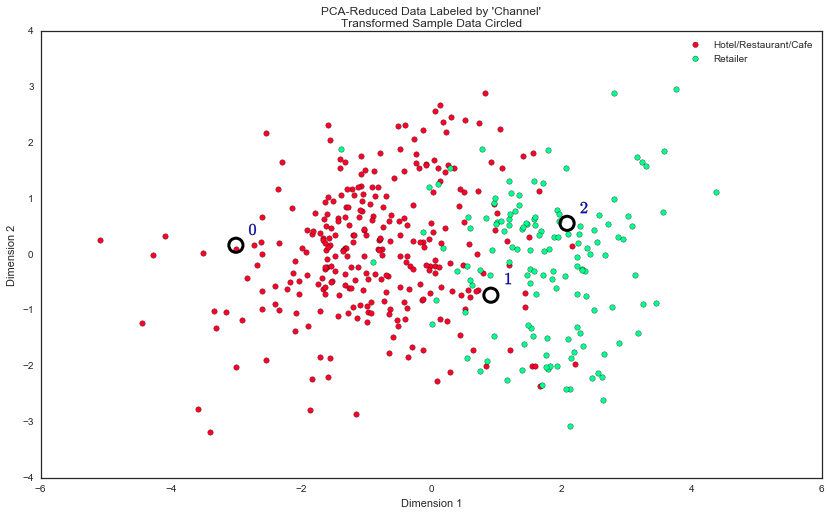

In [29]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The above visualaization seems consistent with our clustering (number of clusters = 2) outcome. Most of the customers labelled as 'HoReCa' fall in the Segment 1 whereas same is true for 'Retailers' which mostly seem to lie within segment 0. However, I do not think that given the distributions (as the distributions overlap), customer segments can be classified as purely 'Retailers' or 'Hotel/ Restaurant/ Cafe'.

The distributions are also partly consistent with my definition of the two segments as I had defined segment 1 ('HoReCa') as establishments with prepared food services and segment 0 as retail outlets without anu prepared food services.  

. > **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.